In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

     |████████████████████████████████| 8.5 MB 3.8 MB/s eta 0:00:01     |██████████████████████████████  | 7.9 MB 3.8 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import numpy as np
import os

In [2]:
initial_data = yf.download("GOOG ", start="2020-01-01", end="2020-11-30")


[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...
2020-11-20,1765.209961,1774.000000,1741.859985,1742.189941,1742.189941,2313500
2020-11-23,1749.599976,1753.900024,1717.719971,1734.859985,1734.859985,2161600
2020-11-24,1730.500000,1771.599976,1727.689941,1768.880005,1768.880005,1578000


<AxesSubplot:xlabel='Date'>

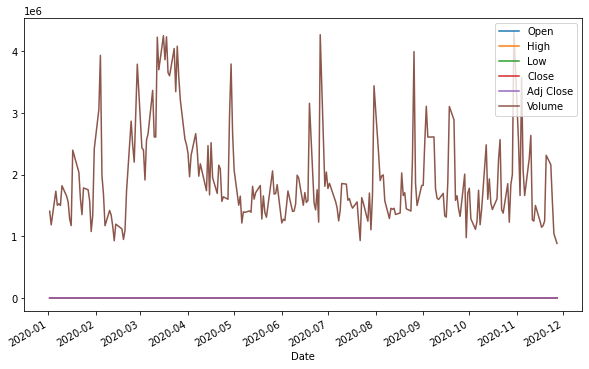

In [4]:
initial_data.plot(figsize=(10, 6))

In [5]:
#HISTORICAL AND MARKET VOLATILITY
#HISTORICAL VOLATILITY

In [6]:
GOOG = initial_data
S = GOOG['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 1793.19 .


In [8]:
log_return = np.log(GOOG['Adj Close'] / GOOG['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 39.97 %


In [9]:
#MARKET VOLATILITY

In [10]:
print('The market volatility is', round(GOOG['Adj Close'][-1],2) , '% .')


The market volatility is 1793.19 % .


In [11]:
S0 = 1793.19              # spot stock price
K = 1793.19               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sigma = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [12]:
import numpy as np
import os

In [13]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor

In [14]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1


In [15]:
S

array([[1793.19      , 2012.67807426, 2259.03168688, 2535.53920401],
       [   0.        , 1597.63770333, 1793.19      , 2012.67807426],
       [   0.        ,    0.        , 1423.41092194, 1597.63770333],
       [   0.        ,    0.        ,    0.        , 1268.18404978]])

In [16]:

a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [17]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 195.55229667],
       [  0.        ,   0.        ,   0.        , 525.00595022]])

In [18]:
#EUROPEAN OPTION

In [19]:

# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 74.50022438,  26.75008968,   0.        ,   0.        ],
       [  0.        , 158.22632847,  72.32593914,   0.        ],
       [  0.        ,   0.        , 310.99131729, 195.55229667],
       [  0.        ,   0.        ,   0.        , 525.00595022]])

In [20]:

print('European ' + payoff, str( V[0,0]))

European put 74.50022438298289


In [21]:
#AMERICAN OPTION

In [22]:

# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 88.30540975,  26.75008968,   0.        ,   0.        ],
       [  0.        , 195.55229667,  72.32593914,   0.        ],
       [  0.        ,   0.        , 369.77907806, 195.55229667],
       [  0.        ,   0.        ,   0.        , 525.00595022]])

In [23]:

print('American ' + payoff, str( V[0,0]))


American put 88.30540975001028


In [24]:
#MONTE CARLO SIMULATION

In [25]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [26]:
S0 = 1793.19              # spot stock price
K = 1793.19               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sigma = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [27]:
S = mcs_simulation_np(1000)

In [28]:

S = np.transpose(S)
S

array([[1793.19      , 1801.79171575, 1807.60940915, ..., 2000.68483673,
        1981.61958868, 1980.20742881],
       [1793.19      , 1795.2160964 , 1798.62560849, ..., 1957.86111536,
        1960.52766084, 1946.21455563],
       [1793.19      , 1769.51489486, 1780.466545  , ..., 1858.25480492,
        1856.6363141 , 1881.48856958],
       ...,
       [1793.19      , 1802.02708714, 1796.95284175, ..., 1937.10693432,
        1942.01378316, 1952.39863484],
       [1793.19      , 1785.19359382, 1781.32628924, ..., 1865.78034538,
        1869.82609663, 1848.19581102],
       [1793.19      , 1779.83349514, 1775.07928573, ..., 1860.51485669,
        1866.72807574, 1851.54997031]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

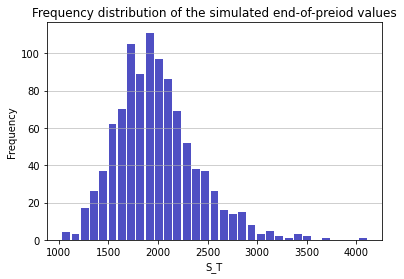

In [29]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [30]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 71.07148344938716


In [32]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 263.6922128604821


In [33]:
#VEGA

In [34]:
import scipy.stats as si

In [35]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [36]:
vega(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'call')

679.8011999678736

In [37]:

vega(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'put')

679.8011999678736

In [38]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(1793.19, 1793.19, 1, 0.05, 0.03, vol[i], 'call')


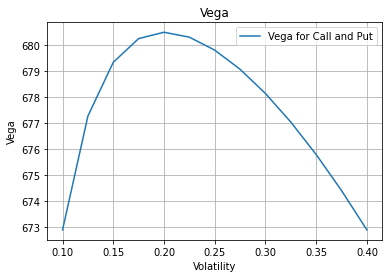

In [39]:

fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [41]:
#RHO

In [42]:

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [43]:
rho(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'call')

822.2558345349652

In [44]:
rho(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'put')


-883.4792571854701

In [45]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(1793.19, 100, 1, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(1793.19, 100, 1, r[i], 0.03, 0.25, 'put')


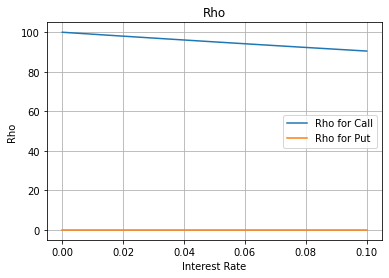

In [46]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [47]:
#THETA

In [48]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [49]:
theta(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'call')

95.74520501126106

In [50]:
theta(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'put')


107.2860527776136

In [51]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(1793.19, 1793.19, T[i], 0.05, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(1793.19, 1793.19, T[i], 0.05, 0.03, 0.25, 'put')

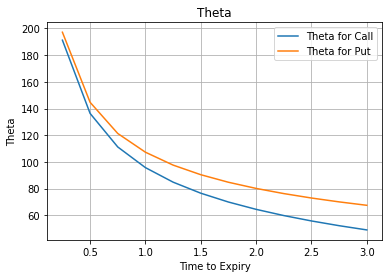

In [52]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])


In [53]:
#GAMMA

In [54]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [55]:
gamma(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'call')


0.0008289024283813854

In [56]:
gamma(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'put')


0.0008289024283813854

In [57]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 1793.19, 1, 0.05, 0.03, 0.25, 'call')

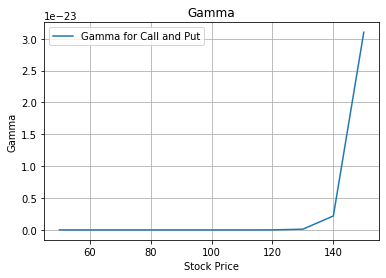

In [58]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [59]:
#SPEED

In [60]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed


In [61]:
speed(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'call')

8.582906496794768e-07

In [62]:
speed(1793.19, 1793.19, 1, 0.05, 0.03, 0.25, 'put')

8.582906496794768e-07

In [63]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 1793.19, 1, 0.05, 0.03, 0.25, 'call')


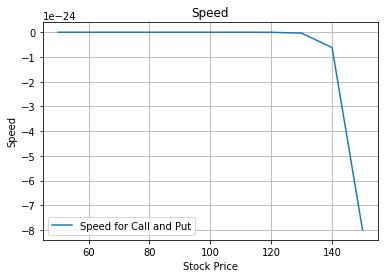

In [64]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])